# LINEAR REGRESSION

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [18]:
#load the dataset

pumpkins = pd.read_csv("../managing-data/cleaned_pumpkins.csv")
pumpkins.head()

,month,package,low_price,high_price,price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


 let's explore the correlations between month and price

In [4]:
cor = pumpkins['month'].corr(pumpkins['price']) *100
print(f"The strength of the relationship between month and price is {cor:.2f}%")

The strength of the relationship between month and price is -13.81%


The relationship is weak and negative with a magnitude of -0.1381 or -13.81%.

In [19]:
new_pumpkins = pd.read_csv("../managing-data/pumpkins.csv")
new_pumpkins.head()

,Unnamed: 0,package,variety,date,low_price,high_price
0,0,24 inch bins,NaN,4/29/17,270.0,280.0
1,1,24 inch bins,NaN,5/6/17,270.0,280.0
2,2,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0
3,3,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0
4,4,24 inch bins,HOWDEN TYPE,11/5/16,90.0,100.0


In [23]:
new_pumpkins.isnull().sum()

Unnamed: 0    0
package       0
variety       5
date          0
low_price     0
high_price    0
dtype: int64

In [22]:
new_pumpkins.dropna()

,Unnamed: 0,package,variety,date,low_price,high_price
2,2,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
3,3,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
4,4,24 inch bins,HOWDEN TYPE,11/5/16,90.00,100.00
5,5,24 inch bins,HOWDEN TYPE,11/12/16,90.00,100.00
6,6,36 inch bins,HOWDEN TYPE,9/24/16,160.00,170.00
...,...,...,...,...,...,...
1752,1752,22 lb cartons,MINIATURE,9/30/16,14.75,14.75
1753,1753,36 inch bins,MINIATURE,9/26/16,275.00,275.00
1754,1754,36 inch bins,MINIATURE,9/27/16,275.00,275.00
1755,1755,36 inch bins,MINIATURE,9/28/16,275.00,275.00


In [24]:
# join two dataframe

pumpkins = pumpkins.merge(new_pumpkins, on=['package', 'low_price', 'high_price'])
print(pumpkins.head())

   month       package  low_price  high_price  price  Unnamed: 0_x variety_x  \
0      4  24 inch bins      270.0       280.0  275.0             0       NaN   
1      4  24 inch bins      270.0       280.0  275.0             0       NaN   
2      4  24 inch bins      270.0       280.0  275.0             1       NaN   
3      4  24 inch bins      270.0       280.0  275.0             1       NaN   
4      5  24 inch bins      270.0       280.0  275.0             0       NaN   

    date_x  Unnamed: 0_y variety_y   date_y  
0  4/29/17             0       NaN  4/29/17  
1  4/29/17             1       NaN   5/6/17  
2   5/6/17             0       NaN  4/29/17  
3   5/6/17             1       NaN   5/6/17  
4  4/29/17             0       NaN  4/29/17  


In [27]:
pumpkins = pd.DataFrame({
    "month": pumpkins['month'],
    "date": pumpkins['date_x'],
    "package": pumpkins['package'],
    "low_price": pumpkins['low_price'],
    "high_price": pumpkins['high_price'],
    "price": pumpkins['price'],
    "variety": pumpkins['variety_x']
})
pumpkins.head()

,month,date,package,low_price,high_price,price,variety
0,4,4/29/17,24 inch bins,270.0,280.0,275.0,NaN
1,4,4/29/17,24 inch bins,270.0,280.0,275.0,NaN
2,4,5/6/17,24 inch bins,270.0,280.0,275.0,NaN
3,4,5/6/17,24 inch bins,270.0,280.0,275.0,NaN
4,5,4/29/17,24 inch bins,270.0,280.0,275.0,NaN


In [28]:
#create a new column called day of year

day_of_year = pd.to_datetime(pumpkins['date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)
pumpkins['day_of_year'] = day_of_year

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_11144\3699466438.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)


In [29]:
#pumpkins.columns = pumpkins.columns.drop('Unnamed: 0')
pumpkins.head()


,month,date,package,low_price,high_price,price,variety,day_of_year
0,4,4/29/17,24 inch bins,270.0,280.0,275.0,NaN,118
1,4,4/29/17,24 inch bins,270.0,280.0,275.0,NaN,118
2,4,5/6/17,24 inch bins,270.0,280.0,275.0,NaN,125
3,4,5/6/17,24 inch bins,270.0,280.0,275.0,NaN,125
4,5,4/29/17,24 inch bins,270.0,280.0,275.0,NaN,118


In [16]:
print(f"The correlation between Day of the year is {pumpkins['day_of_year'].corr(pumpkins['price']):.2f}")

The correlation between Day of the year is -0.12


Let's plot each pumpkins categories using different color. By passing an ax parameter to the `scatter` plotting function we can plot all points on the same graph.

IndexError: list index out of range

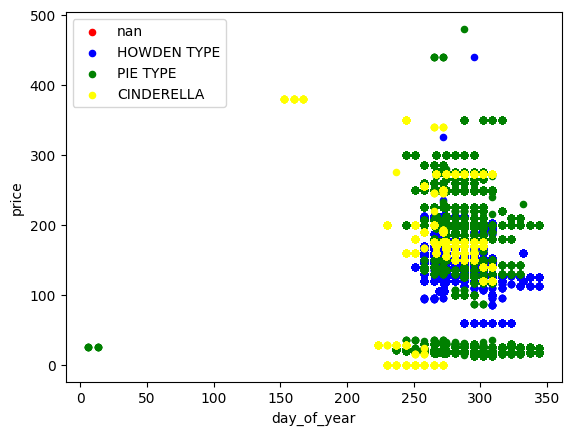

In [30]:
ax = None
colors= ['red', 'blue', 'green', 'yellow']
for i, var in enumerate(pumpkins['variety'].unique()):
    df= pumpkins[pumpkins['variety'] == var]
    ax = df.plot.scatter('day_of_year', 'price', ax=ax, c=colors[i], label =var)

let's create a new dataframe by subsetting using pie type variety.

In [32]:
pie_pumpkins = pumpkins[pumpkins['variety'] == 'PIE TYPE']
#pie_pumpkins.dropna(inplace=True)

pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223230 entries, 36 to 1164068
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   month        223230 non-null  int64  
 1   date         223230 non-null  object 
 2   package      223230 non-null  object 
 3   low_price    223230 non-null  float64
 4   high_price   223230 non-null  float64
 5   price        223230 non-null  float64
 6   variety      223230 non-null  object 
 7   day_of_year  223230 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 15.3+ MB


In [17]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Then, we need to split the data into train and test datasets, so that we can validate our model after training.

In [33]:
X = pie_pumpkins['day_of_year'].to_numpy().reshape(-1, 1)
y = pie_pumpkins['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

To see how accurate the model is, we can predict price on a test dataset, and then measure how close our predictions are to the expected values. This can be done using mean square error (MSE) metrics.

In [36]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f"Mean error: {mse} ({mse/np.mean(pred)*100}%)")

Mean error: 58.79961921963386 (33.7938431117855%)
